<a href="https://colab.research.google.com/github/hris699/TSF-Internship/blob/master/Task_4_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Gathering Data

In [2]:
from google.colab import files

uploaded = files.upload()

Saving Iris.csv to Iris.csv


In [3]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Iris.csv']))

In [4]:
df = df.drop('Id',axis=1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Exploring the Data

In [5]:
df.shape

(150, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
df['Species'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

# Vizualing the Data

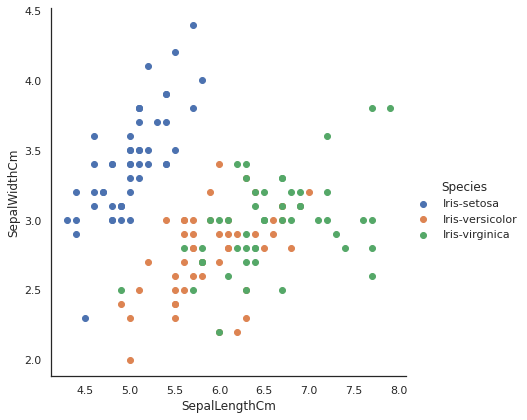

In [15]:
sns.set(style="white", color_codes=True)
sns.FacetGrid(df, hue='Species', size=6)\
.map(plt.scatter, 'SepalLengthCm','SepalWidthCm') \
.add_legend();

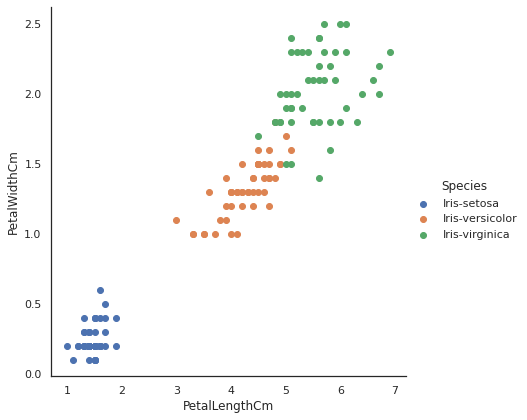

In [16]:
sns.FacetGrid(df, hue='Species', size=6)\
.map(plt.scatter, 'PetalLengthCm','PetalWidthCm') \
.add_legend();

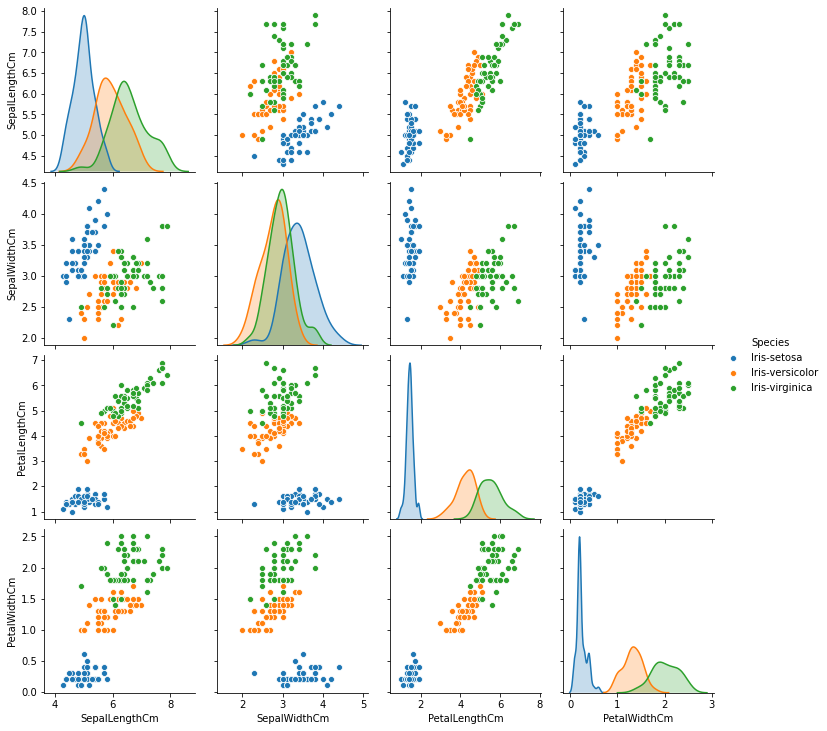

In [11]:
sns.pairplot(df, hue='Species')

In [17]:
X = df.drop(['Species'], axis=1)
y = df['Species']

In [18]:
from sklearn.model_selection import train_test_split

X_train , X_test, y_train, y_test = train_test_split(X,y, test_size = 0.33)

In [19]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train , y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [20]:
y_pred = dtc.predict(X_test)
print(y_pred)

['Iris-setosa' 'Iris-virginica' 'Iris-virginica' 'Iris-setosa'
 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa']


In [23]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[22  0  0]
 [ 0 18  1]
 [ 0  0  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        22
Iris-versicolor       1.00      0.95      0.97        19
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.98        50
      macro avg       0.97      0.98      0.97        50
   weighted avg       0.98      0.98      0.98        50



In [25]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)
print('Accuracy for this model {} %'.format(acc*100))

Accuracy for this model 98.0 %


In [27]:
# important features 

print(dtc.feature_importances_)

#SepalLenCm   SepalWidCm    PetalLenCm     PetalWidCm

[0.00760572 0.03549336 0.06951521 0.88738571]


In [28]:
from sklearn import tree
from sklearn.tree import export_graphviz

from sklearn.datasets import load_iris

iris = load_iris()

tree.export_graphviz(dtc, out_file='tree.dot',
                     feature_names = iris.feature_names, class_names = iris.target_names,
                     rounded = True, proportion = False, precision = 2, filled = True)

In [29]:
!dot -Tpng tree.dot -o tree.png

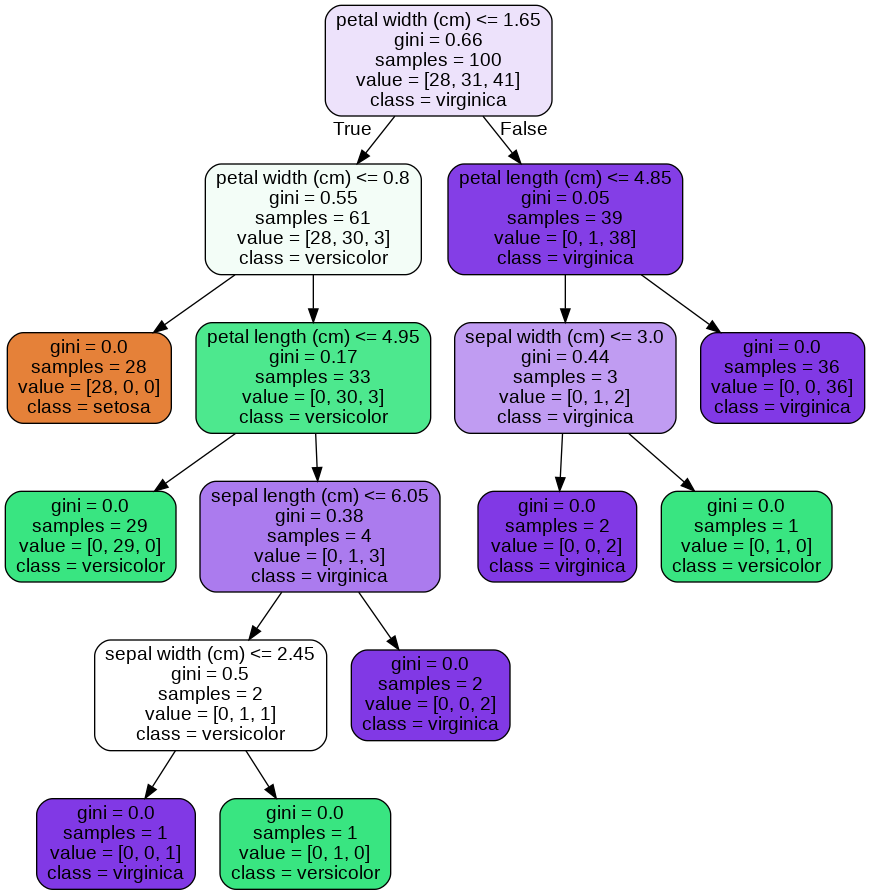

In [30]:
from IPython.display import Image
Image(filename = 'tree.png')